In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData(datadir = "/data_opt_no_omp/")

## Basic statistics

In [3]:
df = analyzer.get_data()

In [4]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,64.0,51.696644,-83.130136,-164.335034,-2.785386,4.062949,1.309125,0.453125,0.0,...,158,63,49,64,0.563807,1.981677,0.952387,0.589658,0.132819,-0.466835
1,1,64.0,61.658206,-99.879755,-196.732239,-3.873138,4.062949,1.309125,0.421875,0.0,...,158,63,49,64,0.664843,2.336800,0.952387,0.589658,0.112635,-0.395890
2,2,64.0,46.995115,-140.378451,-214.198204,-2.358379,4.062949,1.309125,0.390625,0.0,...,158,63,49,64,0.518793,1.823463,0.952387,0.589658,0.144343,-0.507340
3,3,64.0,52.555401,-144.696480,-227.250311,-9.227184,4.062949,1.309125,0.359375,0.0,...,158,63,49,64,1.026177,3.606822,0.952387,0.589658,0.072974,-0.256491
4,4,64.0,50.359917,-167.038203,-246.143376,-10.524996,4.062949,1.309125,0.325000,0.0,...,158,63,49,64,1.095970,3.852131,0.952387,0.589658,0.068327,-0.240157


In [5]:
df["itheta"].unique()

array([1.570796, 0.      , 3.141593, 2.356194, 0.785398, 0.392699])

In [6]:
df_stats = analyzer.do_stats(therm = 0.2)

In [7]:
df_stats.head()

|phi|_mean   Q_L_mean    A_L_mean  \
length itheta   beta nMC     ntherm                                      
4.0    0.785398 1.6  10000.0 0.0           16.0   0.950540  -86.399455   
       1.570796 1.6  10000.0 0.0           16.0   1.091545  -84.845311   
       3.141593 1.6  10000.0 0.0           16.0  30.198727  -36.436676   
8.0    0.785398 1.6  10000.0 0.0           64.0   4.208507 -339.222131   
       1.570796 1.6  10000.0 0.0           64.0   4.913489 -333.919475   

                                       S_L_mean  Xi_L_mean  F_LRe_mean  \
length itheta   beta nMC     ntherm                                      
4.0    0.785398 1.6  10000.0 0.0     -87.146007  12.664993    0.407287   
       1.570796 1.6  10000.0 0.0     -86.559906  12.208513    0.378685   
       3.141593 1.6  10000.0 0.0    -131.308776   0.134008    0.809280   
8.0    0.785398 1.6  10000.0 0.0    -342.527485  44.532248    6.547964   
       1.570796 1.6  10000.0 0.0    -341.637566  41.049910    4.062949   

                                     F_LIm_mean  acc_mean  Q_L_ta  A_L_ta  \
length itheta   beta nMC     ntherm                                         
4.0    0.785398 1.6  10000.0 0.0      -0.296192  0.087619    19.0    22.0   
       1.570796 1.6  10000.0 0.0      -1.490459  0.094274    16.0    18.0   
       3.141593 1.6  10000.0 0.0      -0.737422  0.042014    14.0    34.0   
8.0    0.785398 1.6  10000.0 0.0       0.992736  0.091592    25.0    23.0   
       1.570796 1.6  10000.0 0.0       1.309125  0.095922   158.0    63.0   

                                     ...   acc_std  corr_length_Re_std  \
length itheta   beta nMC     ntherm  ...                                 
4.0    0.785398 1.6  10000.0 0.0     ...  0.000641            0.226699   
       1.570796 1.6  10000.0 0.0     ...  0.001169            0.365367   
       3.141593 1.6  10000.0 0.0     ...  0.000577            0.602905   
8.0    0.785398 1.6  10000.0 0.0     ...  0.000588            1.022579   
       1.570796 1.6  10000.0 0.0     ...  0.000311            1.229378   

                                     corr_length_Im_std  F_Re_py_std  \
length itheta   beta nMC     ntherm                                    
4.0    0.785398 1.6  10000.0 0.0               0.021333          0.0   
       1.570796 1.6  10000.0 0.0               0.073404          0.0   
       3.141593 1.6  10000.0 0.0               0.715349          0.0   
8.0    0.785398 1.6  10000.0 0.0               0.109316          0.0   
       1.570796 1.6  10000.0 0.0               0.358359          0.0   

                                     F_Im_py_std  mass_gap_Re_std  \
length itheta   beta nMC     ntherm                                 
4.0    0.785398 1.6  10000.0 0.0             0.0         0.032957   
       1.570796 1.6  10000.0 0.0             0.0         0.707834   
       3.141593 1.6  10000.0 0.0             0.0         1.246521   
8.0    0.785398 1.6  10000.0 0.0             0.0         0.037924   
       1.570796 1.6  10000.0 0.0             0.0         0.082535   

                                     mass_gap_Im_std  time (sec)  time (min)  \
length itheta   beta nMC     ntherm                                            
4.0    0.785398 1.6  10000.0 0.0            0.003101         9.0    0.150000   
       1.570796 1.6  10000.0 0.0            0.090257         9.0    0.150000   
       3.141593 1.6  10000.0 0.0            1.387943         9.0    0.150000   
8.0    0.785398 1.6  10000.0 0.0            0.019441        55.0    0.916667   
       1.570796 1.6  10000.0 0.0            0.032607        55.0    0.916667   

                                     time (hr)  
length itheta   beta nMC     ntherm             
4.0    0.785398 1.6  10000.0 0.0      0.002500  
       1.570796 1.6  10000.0 0.0      0.002500  
       3.141593 1.6  10000.0 0.0      0.002500  
8.0    0.785398 1.6  10000.0 0.0      0.015278  
       1.570796 1.6  10000.0 0.0      0.015278  

[5 rows x 35 columns]

# Observable plots

In [8]:
beta = 1.6
nMC = 10000
plot_params = {"beta": beta, "nMC": nMC}

In [9]:
df_stats = analyzer.do_stats(therm = 0.4, **plot_params)

In [10]:
df_stats.columns

Index(['|phi|_mean', 'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean',
       'F_LRe_mean', 'F_LIm_mean', 'acc_mean', 'Q_L_ta', 'A_L_ta', 'S_L_ta',
       'Xi_L_ta', 'corr_length_Re_mean', 'corr_length_Im_mean', 'F_Re_py_mean',
       'F_Im_py_mean', 'mass_gap_Re_mean', 'mass_gap_Im_mean', '|phi|_std',
       'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std', 'F_LRe_std', 'F_LIm_std',
       'acc_std', 'corr_length_Re_std', 'corr_length_Im_std', 'F_Re_py_std',
       'F_Im_py_std', 'mass_gap_Re_std', 'mass_gap_Im_std', 'time (sec)',
       'time (min)', 'time (hr)'],
      dtype='object')

### Q_L

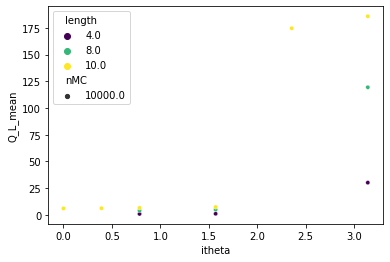

In [11]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

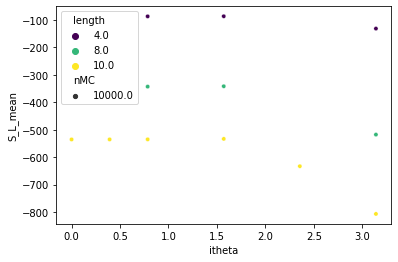

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### Xi_L

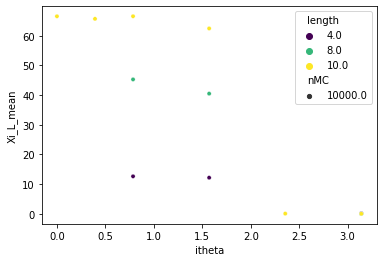

In [13]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### F_L Re

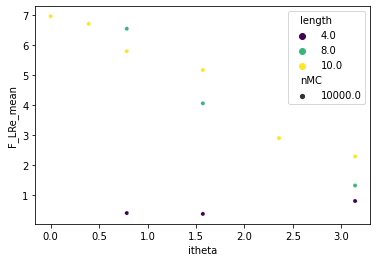

In [14]:
sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

In [15]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
length itheta   beta nMC     ntherm Source          
4.0    0.785398 1.6  10000.0 0.0    C++    -0.296192
                                    Python  0.133780
       1.570796 1.6  10000.0 0.0    C++    -1.490459
                                    Python -0.109932
       3.141593 1.6  10000.0 0.0    C++    -0.737422

In [16]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [17]:
F_L_df.head()

F_L_Re    F_L_Im
length itheta   beta nMC     ntherm Source                    
4.0    0.785398 1.6  10000.0 0.0    C++     0.407287 -0.296192
                                    Python  0.704510  0.133780
       1.570796 1.6  10000.0 0.0    C++     0.378685 -1.490459
                                    Python  0.498366 -0.109932
       3.141593 1.6  10000.0 0.0    C++     0.809280 -0.737422

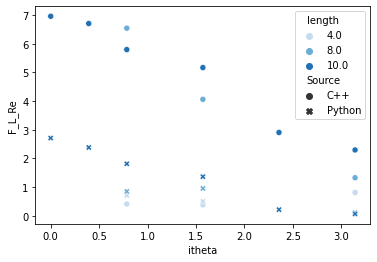

In [18]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Re", hue = "length", 
                style = "Source", palette = sns.color_palette("Blues", 3))
plt.show()

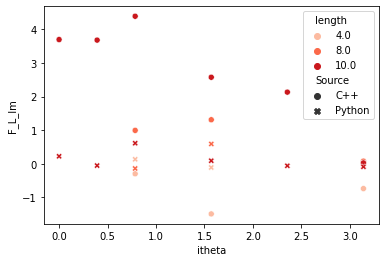

In [19]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Im", hue = "length", 
                style = "Source", palette = sns.color_palette("Reds", 3))
plt.show()

## Correlation Length

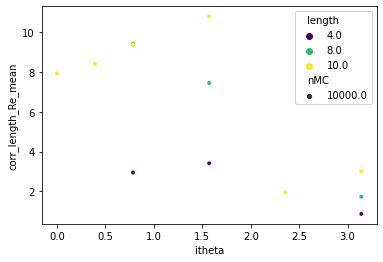

In [20]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

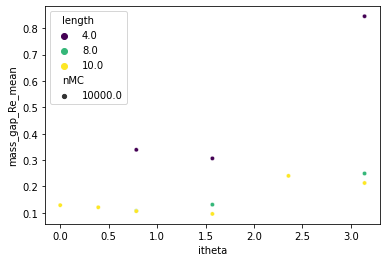

In [21]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()